In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [2]:
# Load the dataset and set the column names
df = pd.read_csv('Dataset/ratings_Electronics.csv', names=['userId', 'productId','rating','timestamp'])

In [3]:
# Display shape
df.shape

(7824482, 4)

In [4]:
# Display columns
df.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

The dataset contains over 7.8 million entries. 
Taking 2000000 random entries from the dataset as a sample because the dataset is too large.

In [5]:
# Create dataframe from taking a sample from 'df' with 2000000 records
product_data = df.sample(n=2000000, ignore_index=True)

In [6]:
# Delete the previous dataframe to release the memory
del df

In [7]:
# Display the top 5 records of the dataframe
product_data.head()

,userId,productId,rating,timestamp
0,A33M5G6V9LNGJ3,B001NJ0D0Y,5.0,1335312000
1,ABZD1TT699GLH,B00DZTVST0,5.0,1394150400
2,A18HE80910BTZI,B00AR95EVE,5.0,1366675200
3,AE2EDF2SUZXOU,B001JHSD3Y,2.0,1249430400
4,A3BXHHJZGNAXEF,B000TKHGL2,4.0,1262822400


In [8]:
# Display information of the dataframe
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.0+ MB


In [9]:
# Delete the unnecessary timestamp column
product_data.drop('timestamp', axis=1, inplace=True)

In [10]:
# Display data description
product_data.describe()

,rating
count,2.000000e+06
mean,4.013307e+00
std,1.380227e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [11]:
# Count null values
product_data.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

In [12]:
# Count duplicated values
product_data.duplicated().sum()

0

Proceeding forward due to zero null and duplicated values

Displaying Rating Distribution as a graph

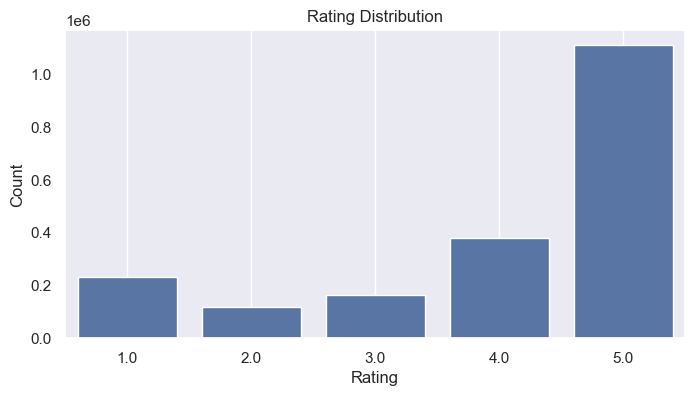

In [13]:
# Set size of the figure
plt.figure(figsize=(8,4))

# Create a count plot based on the 'rating' column
sns.countplot(x='rating',data=product_data)

# Add a title to the plot
plt.title('Rating Distribution')

# Add a label to the x-axis
plt.xlabel('Rating')

# Add a label to the y-axis
plt.ylabel('Count')

# Add a grid to the plot
plt.grid()

# Display plot
plt.show()

Analyzing the rating by user

In [14]:
print('Total rating : ',product_data.shape[0])
print('Total unique users : ',product_data['userId'].nunique())
print('Total unique products : ',product_data['productId'].nunique())

Total rating :  2000000
Total unique users :  1502048
Total unique products :  266852


In [15]:
# Count the number of rated products per user
no_of_rated_products_per_user = product_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

userId
A5JLAU2ARJ0BO     143
ADLVFFE4VBT8      131
A3OXHLG6DIBRW8    127
A680RUE1FDO8B     114
A6FIAB28IS79      102
Name: rating, dtype: int64

In [16]:
# Count the number of users who have rated more than 50 products
print('Number of users who have rated more than 50 products : {} '.format(sum(no_of_rated_products_per_user >= 50)))

Number of users who have rated more than 50 products : 60 


## Popularity Based Recommendation
To suggest products to user who just signed up

In [17]:
# Filter the products with more than 50 ratings and making a new dataframe
data = product_data.groupby('productId').filter(lambda x:x['rating'].count()>=50)

In [18]:
data.head()

,userId,productId,rating
0,A33M5G6V9LNGJ3,B001NJ0D0Y,5.0
1,ABZD1TT699GLH,B00DZTVST0,5.0
4,A3BXHHJZGNAXEF,B000TKHGL2,4.0
5,A1L4T389E8UJ2,B007R5YDYA,5.0
8,AXGUQZJU2BDDC,B001D9IGRG,5.0


In [19]:
# Calculate the number of ratings per product
# Sort the results in the descending order 
no_of_rating_per_product = data.groupby('productId')['rating'].count().sort_values(ascending=False)

In [20]:
no_of_rating_per_product.head()

productId
B0074BW614    4688
B00DR0PDNE    4261
B007WTAJTO    3565
B0019EHU8G    3245
B006GWO5WK    3132
Name: rating, dtype: int64

In [21]:
# Create a list of the top 20 products
top_20_products = no_of_rating_per_product.head(20).index.tolist()

# Print the top 20 products using a for loop
print("Top 20 Products based on Number of Ratings:")
for i, product_id in enumerate(top_20_products, 1):
    print(f"{i}. Product ID: {product_id}")


Top 20 Products based on Number of Ratings:
1. Product ID: B0074BW614
2. Product ID: B00DR0PDNE
3. Product ID: B007WTAJTO
4. Product ID: B0019EHU8G
5. Product ID: B006GWO5WK
6. Product ID: B003ELYQGG
7. Product ID: B003ES5ZUU
8. Product ID: B007R5YDYA
9. Product ID: B00622AG6S
10. Product ID: B0002L5R78
11. Product ID: B008OHNZI0
12. Product ID: B003LR7ME6
13. Product ID: B000LRMS66
14. Product ID: B009SYZ8OC
15. Product ID: B00BGA9WK2
16. Product ID: B004QK7HI8
17. Product ID: B00BGGDVOO
18. Product ID: B009A5204K
19. Product ID: B0098F5W0Q
20. Product ID: B002WE6D44


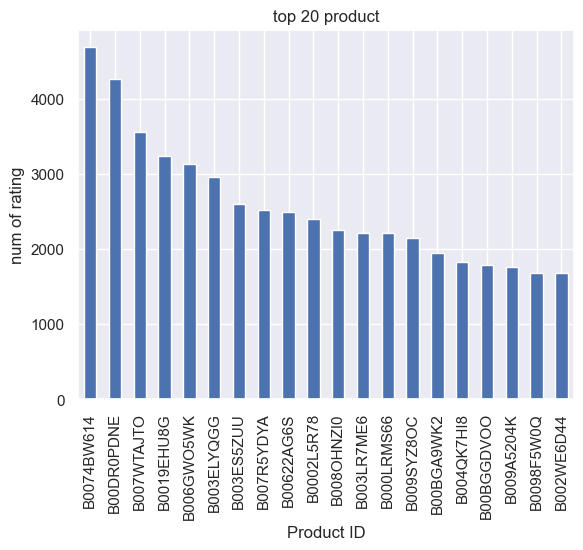

In [22]:
# Create a bar plot of the top 20 most rated products
no_of_rating_per_product.head(20).plot(kind='bar')

# Add a title to the plot
plt.title('top 20 product')

# Add label to the x-axis
plt.xlabel('Product ID')

# Add label to the x-axis
plt.ylabel('num of rating')

# Display plot
plt.show()

In [23]:
# Calculate the average rating for each product
# Create a new dataframe from that data
mean_rating_per_product = pd.DataFrame(data.groupby('productId')['rating'].mean())

In [24]:
mean_rating_per_product.head()

,rating
productId,
0972683275,4.416667
1400501466,3.753846
1400532655,3.878788
140053271X,3.645161
1400599997,3.560000


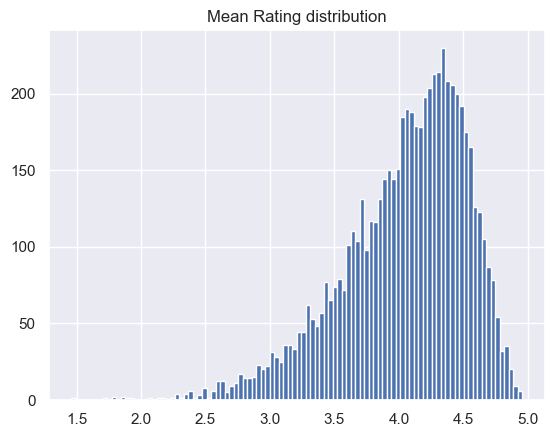

In [25]:
# Create histogram with 100 bins
plt.hist(mean_rating_per_product['rating'],bins=100)

# Add a title to the histogram 
plt.title('Mean Rating distribution')

# Display histogram
plt.show()

In [26]:
# Check the skewness of the mean rating data
mean_rating_per_product['rating'].skew()

-0.8991356572130553

Moderately negatively skewed 

In [27]:
# Add a rating_count column to the mean_rating_per_product dataframe
mean_rating_per_product['rating_counts'] = data.groupby('productId')['rating'].count()

In [28]:
mean_rating_per_product.head()

,rating,rating_counts
productId,,
0972683275,4.416667,252
1400501466,3.753846,65
1400532655,3.878788,132
140053271X,3.645161,93
1400599997,3.560000,50


In [29]:
# Find the product with the highest mean rating
mean_rating_per_product[mean_rating_per_product['rating_counts'] == mean_rating_per_product['rating_counts'].max()]

,rating,rating_counts
productId,,
B0074BW614,4.485708,4688


In [30]:
# The minimum number of ratings a product can have
min_rating_counts = mean_rating_per_product['rating_counts'].min()

# The number of products with the minimum number of ratings
total_min_rating_products = mean_rating_per_product[mean_rating_per_product['rating_counts']==min_rating_counts].shape[0]

print('Minimum rating count for a product :', min_rating_counts)
print('Total products with the minimum rating count :', total_min_rating_products)

Minimum rating count for a product : 50
Total products with the minimum rating count : 161


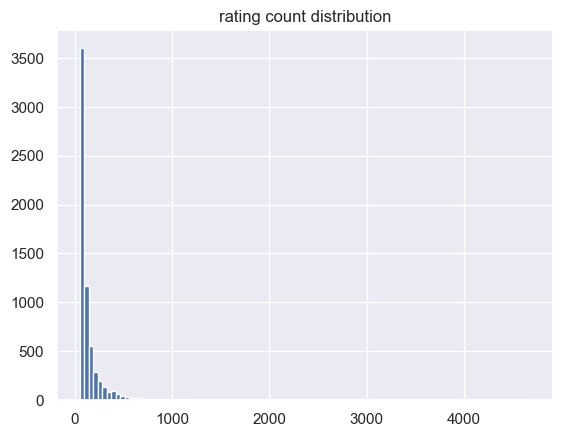

In [31]:
# Create histogram with 100 bins
plt.hist(mean_rating_per_product['rating_counts'],bins=100)

# Add a title to the histogram 
plt.title('rating count distribution')

# Display histogram
plt.show()

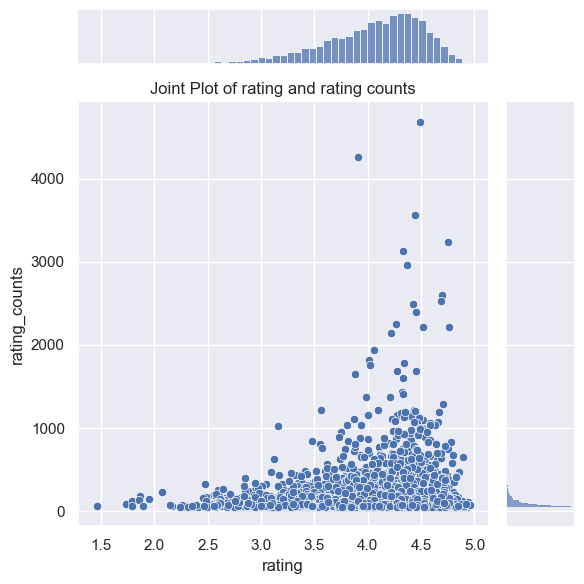

In [32]:
# Create a joint plot with x and y axes representing mean rating and rating count
sns.jointplot(x='rating',y='rating_counts',data=mean_rating_per_product)

# Add a title to the joint plot
plt.title('Joint Plot of rating and rating counts')

# Prevent subplots from overlapping
plt.tight_layout()

# Display the joint plot
plt.show()

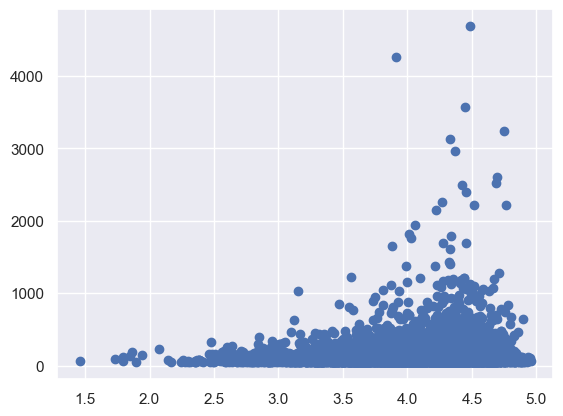

In [33]:
# Create a scatter plot with x and y axes representing mean rating and rating count
plt.scatter(x=mean_rating_per_product['rating'], y=mean_rating_per_product['rating_counts'])

# Display the scatter plot
plt.show()

In [34]:
# Calculate the Pearson correlation coefficient between mean rating and ratings count
correlation = mean_rating_per_product['rating'].corr(mean_rating_per_product['rating_counts'])
print(f'Correlation between Rating and Rating Counts is : {correlation}')

Correlation between Rating and Rating Counts is : 0.10532652555357228


Not much of a correlation

## Collaborative Filtering

In [35]:
# Import libraries for collaborative filtering approach
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [36]:
# Specify the rating scale of data 
reader = Reader(rating_scale=(1, 5))

# load the data from "data" into a format suitable for collaborative filtering
surprise_data = Dataset.load_from_df(data, reader)

In [37]:
#Split the surprise dataset into 80:20 ratio using train_test_split
trainSet, testSet = train_test_split(surprise_data, test_size=0.3,random_state=42)

#### Creating a collaborative filtering algorithm (KNNWithMeans) with specified parameters
k=5: Number of neighbors to consider

'name': Similarity measure (how similar two things are) to use 'pearson_baseline'

'user_based': Whether to use user-based or item-based collaborative filtering (set to False for item-based)

In [38]:
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})

# Train the collaborative filtering algorithm on the training dataset
algo.fit(trainSet)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [39]:
# Make predictions on the testing dataset and store the prediction objects in the 'test_pred' list
test_pred = algo.test(testSet)

Calculate and print the Root Mean Squared Error (RMSE) for the collaborative filtering model on the test set
###### RMSE is a metric for evaluating the accuracy of predictions

In [40]:
print("Item-based Model : Test Set")
# 'verbose=True' is set to display additional information (Print "RMSE: x")
accuracy.rmse(test_pred ,verbose=True)

Item-based Model : Test Set
RMSE: 1.3178


1.3177760746465115

In [41]:
# Create smaller dataframe with 20000 random samples from 'data'
data2 = data.sample(20000)

# Create pivot table from the data2 DataFrame
ratings_matrix = data2.pivot_table(values='rating', index='productId', columns='userId', fill_value=0)
ratings_matrix.head()

userId,A00033481VZEEGYXEN32T,A0077819240YSF8572N8A,A01316301UCJ0UCEUVRHB,A01569123INC4XUZXJ0RL,A0192486Q87XYFCG9OFW,A03299993GLHG3GY0QDI5,A0387329AGWZ5XQT07S2,A04276221VWQQ6W5WOUVI,A06391773PDSSTRNC534C,A06825387YP3WYRBNFI6,...,AZYVS3H3V03SL,AZZ0DDJUOD3GA,AZZ1B8DPRTHY9,AZZAX6DNC2VBP,AZZCVLYL921Q7,AZZDKAD5RYGX9,AZZM0MGLACRHJ,AZZMRAY3BHVN8,AZZTC2OYVNE2Q,AZZUDFTLIOYLI
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400532655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140053271X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400599997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000001ON6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# Decompose ratings matrix using Truncated Singular Value Decomposition (SVD)
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(ratings_matrix)
decomposed_matrix.shape

(5430, 10)

In [43]:
# Calculate the correlation matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(5430, 5430)

In [44]:
def recommend_products(selected_product_id, print_correlation = False, top_n=21, correlation_threshold=0.85):
    # Find the index of the specified product ID
    try:
        # Make a list of index values
        product_names = list(ratings_matrix.index)
        product_id_index = product_names.index(selected_product_id)
    except ValueError:
        print(f"Product ID '{selected_product_id}' not found in the dataset.")
        return None

    # Extract the row corresponding to the specified product ID from the correlation matrix
    correlation_product_id = correlation_matrix[product_id_index]

    # Filter the rows of the correlation matrix with products with a correlation value above the threshold
    similar_products_indices = np.where(correlation_product_id > correlation_threshold)[0]

    # Get the indices of the top N highest correlation values
    top_indices = np.argsort(correlation_product_id[similar_products_indices])[-top_n:-1][::-1]

    # Create a dictionary with product IDs as keys and their correlation values as values
    correlation_dict = {product_names[similar_products_indices[x]]: correlation_product_id[similar_products_indices[x]] for x in top_indices}

    # Print the recommended products
    print(f"Top {top_n} Recommended Products for '{product_id}':")
    if print_correlation:
        for recommended_product_id, correlation_value in correlation_dict.items():
            print(f"Product ID: {recommended_product_id}, Correlation Value: {correlation_value}")
    else:
        for recommended_product_id, correlation_value in correlation_dict.items():
            print(f"Product ID: {recommended_product_id}")

# Example usage:
recommend_products("B00001P4ZH", True)

Top 21 Recommended Products for 'B002WE6D44':
Product ID: B00030097G, Correlation Value: 0.9897145451072141
Product ID: B0039825LM, Correlation Value: 0.9835442345522758
Product ID: B00A2T6X0K, Correlation Value: 0.9774972534816574
Product ID: B00126PHV8, Correlation Value: 0.9755651230532626
Product ID: B00DXFDHV8, Correlation Value: 0.9720280443776125
Product ID: B001F7AJKI, Correlation Value: 0.9715160192070658
Product ID: B000I6F0T2, Correlation Value: 0.9690109568886254
Product ID: B008R77ZCO, Correlation Value: 0.9689731458926841
Product ID: B003I4FHNA, Correlation Value: 0.9684930366232346
Product ID: B004JOQSEA, Correlation Value: 0.9673947281050649
Product ID: B000ETTFRG, Correlation Value: 0.9667253479788368
Product ID: B005D2JE2A, Correlation Value: 0.9663453117677135
Product ID: B00GPH6T8E, Correlation Value: 0.9657774316716444
Product ID: B0043CVH2Q, Correlation Value: 0.963881567942303
Product ID: B00CRQUKQ4, Correlation Value: 0.9634789393765171
Product ID: B000063TJY, C